In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("asd_all_ML.csv").drop("Unnamed: 0", axis=1)
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age',
       'Sex', 'Jaundice', 'Family_ASD', 'Class', 'asian', 'black', 'hispanic',
       'latino', 'middle eastern', 'others', 'south asians', 'white'],
      dtype='object')

In [3]:
cleanup = {"Class": {0: "No", 1: "Yes"}}
df.replace(cleanup, inplace=True)
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Family_ASD,Class,asian,black,hispanic,latino,middle eastern,others,south asians,white
0,0,1,1,0,0,1,1,0,0,1,...,0,No,0,0,0,0,1,0,0,0
1,0,1,1,1,1,1,1,0,0,1,...,0,Yes,0,0,0,0,1,0,0,0
2,0,1,1,1,1,1,0,1,1,1,...,0,Yes,0,0,0,0,0,0,0,1
3,0,1,1,0,1,1,1,0,0,0,...,0,No,0,0,0,0,1,0,0,0
4,0,0,1,1,1,1,0,1,0,1,...,0,No,0,0,0,0,0,0,0,1


# ML with just Jaundice as predictor of Class

In [4]:
X = pd.DataFrame(df['Jaundice'])
Y = df['Class']
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(
    X, Y, test_size=validation_size, random_state=seed)

In [5]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [6]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

results = []
names = []

# evaluate each model in turn
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(
        model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarn

LR: 0.600443 (0.040571)
LDA: 0.595074 (0.034905)
KNN: 0.508407 (0.101850)
CART: 0.600443 (0.040571)


/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/m

RF: 0.595074 (0.034905)
NB: 0.595074 (0.038072)


/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anacon

SVM: 0.600443 (0.040571)


Logistic Regression was had a sqaured value of .6

# ML with all predictors 

In [7]:
X = df.drop("Class", axis=1)
Y = df['Class']
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(
    X, Y, test_size=validation_size, random_state=seed)

In [8]:
seed = 7
scoring = 'accuracy'

results = []
names = []

# evaluate each model in turn
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(
        model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarn

LR: 0.990662 (0.006797)
LDA: 0.965320 (0.013906)
KNN: 0.893919 (0.013568)
CART: 0.929284 (0.021547)
RF: 0.945293 (0.017851)


/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/m

NB: 0.918609 (0.027628)


/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anacon

SVM: 0.951978 (0.014523)


/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anacon

Logistic Regression had r-squared value of .99

RF had rsquared of .95

### Random Forest with hyperparameter tuning 

In [9]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(X_train, Y_train)
    result = accuracy_score(Y_validation, forest.predict(X_validation))
    results.append(result) 
    print(n, ':', result)

1 : 0.8933333333333333
4 : 0.9093333333333333
5 : 0.904
8 : 0.9146666666666666
10 : 0.92
20 : 0.936
50 : 0.952
75 : 0.9546666666666667
100 : 0.9546666666666667
250 : 0.96
500 : 0.9626666666666667


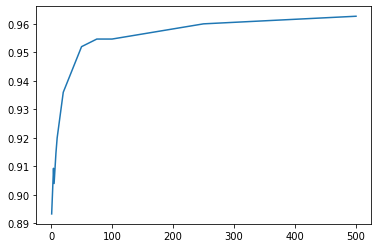

In [10]:
plt.plot(n_estimators_array, results)

In [11]:
from sklearn.model_selection import RandomizedSearchCV
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [12]:
rf = RandomForestClassifier(n_estimators=500)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42)
# Fit the random search model
rf_random.fit(X_train, Y_train)

/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 90 is smaller than n_iter=100. Running 90 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV] min_samples_leaf=1, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=1, max_features=auto, max_depth=10 .............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=1, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=2, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=2, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=2, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.7s
[CV] min_samples_leaf=4, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.7s
[CV] min_samples_leaf=4, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=4, max_features=auto, max_depth=10 ......

[CV]  min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.6s
[CV] min_samples_leaf=2, max_features=auto, max_depth=30 .............
[CV]  min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.6s
[CV] min_samples_leaf=4, max_features=auto, max_depth=30 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=30, total=   0.6s
[CV] min_samples_leaf=4, max_features=auto, max_depth=30 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=30, total=   0.6s
[CV] min_samples_leaf=4, max_features=auto, max_depth=30 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=30, total=   0.6s
[CV] min_samples_leaf=1, max_features=None, max_depth=30 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=30, total=   0.8s
[CV] min_samples_leaf=1, max_features=None, max_depth=30 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=30, total=   0.8s
[CV] min_samples_leaf=1, max_features=None, max_depth=30 ......

[CV]  min_samples_leaf=4, max_features=auto, max_depth=50, total=   0.6s
[CV] min_samples_leaf=4, max_features=auto, max_depth=50 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=50, total=   0.6s
[CV] min_samples_leaf=1, max_features=None, max_depth=50 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=50, total=   0.8s
[CV] min_samples_leaf=1, max_features=None, max_depth=50 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=50, total=   0.9s
[CV] min_samples_leaf=1, max_features=None, max_depth=50 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=50, total=   0.8s
[CV] min_samples_leaf=2, max_features=None, max_depth=50 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=50, total=   0.8s
[CV] min_samples_leaf=2, max_features=None, max_depth=50 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=50, total=   0.8s
[CV] min_samples_leaf=2, max_features=None, max_depth=50 ......

[CV]  min_samples_leaf=1, max_features=None, max_depth=70, total=   0.8s
[CV] min_samples_leaf=1, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=70, total=   0.8s
[CV] min_samples_leaf=2, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=70, total=   0.8s
[CV] min_samples_leaf=2, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=70, total=   0.8s
[CV] min_samples_leaf=2, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=70, total=   0.8s
[CV] min_samples_leaf=4, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=4, max_features=None, max_depth=70, total=   0.7s
[CV] min_samples_leaf=4, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=4, max_features=None, max_depth=70, total=   0.8s
[CV] min_samples_leaf=4, max_features=None, max_depth=70 ......

[CV]  min_samples_leaf=2, max_features=None, max_depth=90, total=   0.8s
[CV] min_samples_leaf=2, max_features=None, max_depth=90 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=90, total=   0.8s
[CV] min_samples_leaf=4, max_features=None, max_depth=90 .............
[CV]  min_samples_leaf=4, max_features=None, max_depth=90, total=   0.8s
[CV] min_samples_leaf=4, max_features=None, max_depth=90 .............
[CV]  min_samples_leaf=4, max_features=None, max_depth=90, total=   0.7s
[CV] min_samples_leaf=4, max_features=None, max_depth=90 .............
[CV]  min_samples_leaf=4, max_features=None, max_depth=90, total=   0.8s
[CV] min_samples_leaf=1, max_features=log2, max_depth=90 .............
[CV]  min_samples_leaf=1, max_features=log2, max_depth=90, total=   0.6s
[CV] min_samples_leaf=1, max_features=log2, max_depth=90 .............
[CV]  min_samples_leaf=1, max_features=log2, max_depth=90, total=   0.6s
[CV] min_samples_leaf=1, max_features=log2, max_depth=90 ......

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  3.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=500,
                                                    n_jobs=None,
 

In [13]:
rf_random.best_params_

{'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30}

In [14]:
forest = RandomForestClassifier(n_estimators=20, min_samples_leaf=2, max_features='auto', max_depth=50)
forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
forestPredictions = forest.predict(X_validation)
print(confusion_matrix(Y_validation, forestPredictions))
print(classification_report(Y_validation, forestPredictions))

[[223   9]
 [ 14 129]]
              precision    recall  f1-score   support

          No       0.94      0.96      0.95       232
         Yes       0.93      0.90      0.92       143

    accuracy                           0.94       375
   macro avg       0.94      0.93      0.93       375
weighted avg       0.94      0.94      0.94       375



south asians      0.000715
others            0.001106
hispanic          0.001205
black             0.002016
latino            0.002239
Jaundice          0.005594
asian             0.006361
Family_ASD        0.007027
Sex               0.010402
middle eastern    0.010608
white             0.014447
A2                0.026814
A8                0.042896
Age               0.043785
A10               0.060744
A1                0.066945
A7                0.072246
A3                0.088937
A5                0.091605
A9                0.121197
A6                0.152549
A4                0.170561
dtype: float64


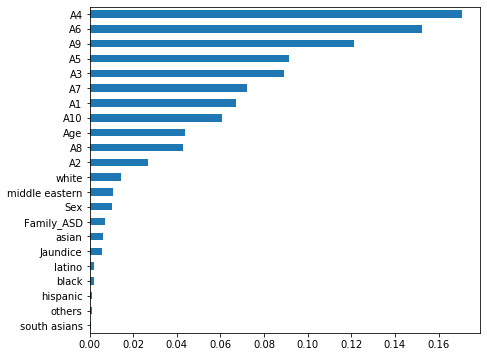

In [16]:
feature_importances = pd.Series(forest.feature_importances_, index=X.columns)
feature_importances.sort_values(inplace=True, ascending=True)
print(feature_importances)
feature_importances.plot(kind='barh', figsize=(7,6))

# Machine Learning using (A1-A10, Sex, and Asian)

In [17]:
X = df.drop(['Family_ASD', 'Class', 'black', 'hispanic',
       'latino', 'middle eastern', 'others', 'Age', 'Jaundice', 'south asians', 'white'], axis=1)
Y = df['Class']
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(
    X, Y, test_size=validation_size, random_state=seed)

In [18]:
seed = 7
scoring = 'accuracy'

results = []
names = []

# evaluate each model in turn
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(
        model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarn

LR: 1.000000 (0.000000)
LDA: 0.969987 (0.015555)
KNN: 0.942631 (0.011223)
CART: 0.950622 (0.015600)


/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/m

RF: 0.961289 (0.022128)
NB: 0.955960 (0.022380)
SVM: 1.000000 (0.000000)


/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anacon

## Hyperparameter tuning

In [19]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(X_train, Y_train)
    result = accuracy_score(Y_validation, forest.predict(X_validation))
    results.append(result) 
    print(n, ':', result)

1 : 0.912
4 : 0.9253333333333333
5 : 0.9253333333333333
8 : 0.944
10 : 0.9546666666666667
20 : 0.9466666666666667
50 : 0.944
75 : 0.944
100 : 0.9466666666666667
250 : 0.944
500 : 0.944


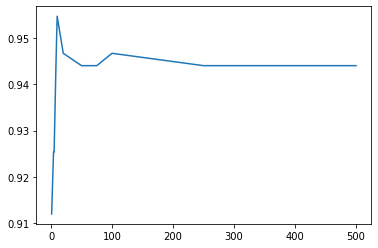

In [20]:
plt.plot(n_estimators_array, results)

In [21]:
from sklearn.model_selection import RandomizedSearchCV
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [22]:
rf = RandomForestClassifier(n_estimators=500)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV] min_samples_leaf=1, max_features=auto, max_depth=10 .............


/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 90 is smaller than n_iter=100. Running 90 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.7s
[CV] min_samples_leaf=1, max_features=auto, max_depth=10 .............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.7s
[CV] min_samples_leaf=1, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=2, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=2, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=2, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=4, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=4, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=4, max_features=auto, max_depth=10 ......

[CV]  min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.5s
[CV] min_samples_leaf=2, max_features=auto, max_depth=30 .............
[CV]  min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.5s
[CV] min_samples_leaf=4, max_features=auto, max_depth=30 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=30, total=   0.5s
[CV] min_samples_leaf=4, max_features=auto, max_depth=30 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=30, total=   0.5s
[CV] min_samples_leaf=4, max_features=auto, max_depth=30 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=30, total=   0.5s
[CV] min_samples_leaf=1, max_features=None, max_depth=30 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=30, total=   0.6s
[CV] min_samples_leaf=1, max_features=None, max_depth=30 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=30, total=   0.7s
[CV] min_samples_leaf=1, max_features=None, max_depth=30 ......

[CV]  min_samples_leaf=4, max_features=auto, max_depth=50, total=   0.6s
[CV] min_samples_leaf=4, max_features=auto, max_depth=50 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=50, total=   0.6s
[CV] min_samples_leaf=1, max_features=None, max_depth=50 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=50, total=   0.7s
[CV] min_samples_leaf=1, max_features=None, max_depth=50 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=50, total=   0.7s
[CV] min_samples_leaf=1, max_features=None, max_depth=50 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=50, total=   0.7s
[CV] min_samples_leaf=2, max_features=None, max_depth=50 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=50, total=   0.7s
[CV] min_samples_leaf=2, max_features=None, max_depth=50 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=50, total=   0.7s
[CV] min_samples_leaf=2, max_features=None, max_depth=50 ......

[CV]  min_samples_leaf=1, max_features=None, max_depth=70, total=   0.6s
[CV] min_samples_leaf=1, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=70, total=   0.6s
[CV] min_samples_leaf=2, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=70, total=   0.6s
[CV] min_samples_leaf=2, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=70, total=   0.6s
[CV] min_samples_leaf=2, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=70, total=   0.6s
[CV] min_samples_leaf=4, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=4, max_features=None, max_depth=70, total=   0.6s
[CV] min_samples_leaf=4, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=4, max_features=None, max_depth=70, total=   0.6s
[CV] min_samples_leaf=4, max_features=None, max_depth=70 ......

[CV]  min_samples_leaf=2, max_features=None, max_depth=90, total=   0.7s
[CV] min_samples_leaf=2, max_features=None, max_depth=90 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=90, total=   0.7s
[CV] min_samples_leaf=4, max_features=None, max_depth=90 .............
[CV]  min_samples_leaf=4, max_features=None, max_depth=90, total=   0.7s
[CV] min_samples_leaf=4, max_features=None, max_depth=90 .............
[CV]  min_samples_leaf=4, max_features=None, max_depth=90, total=   0.7s
[CV] min_samples_leaf=4, max_features=None, max_depth=90 .............
[CV]  min_samples_leaf=4, max_features=None, max_depth=90, total=   0.6s
[CV] min_samples_leaf=1, max_features=log2, max_depth=90 .............
[CV]  min_samples_leaf=1, max_features=log2, max_depth=90, total=   0.6s
[CV] min_samples_leaf=1, max_features=log2, max_depth=90 .............
[CV]  min_samples_leaf=1, max_features=log2, max_depth=90, total=   0.6s
[CV] min_samples_leaf=1, max_features=log2, max_depth=90 ......

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  2.8min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=500,
                                                    n_jobs=None,
 

In [23]:
rf_random.best_params_

{'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None}

In [24]:
forest = RandomForestClassifier(n_estimators=20, min_samples_leaf=2, max_features='auto', max_depth=50)
forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
forestPredictions = forest.predict(X_validation)
print(confusion_matrix(Y_validation, forestPredictions))
print(classification_report(Y_validation, forestPredictions))

[[223   9]
 [  7 136]]
              precision    recall  f1-score   support

          No       0.97      0.96      0.97       232
         Yes       0.94      0.95      0.94       143

    accuracy                           0.96       375
   macro avg       0.95      0.96      0.95       375
weighted avg       0.96      0.96      0.96       375



asian    0.008966
Sex      0.012442
A2       0.043545
A8       0.049193
A1       0.055044
A7       0.062971
A10      0.068768
A3       0.081727
A5       0.137567
A9       0.148008
A6       0.162345
A4       0.169425
dtype: float64


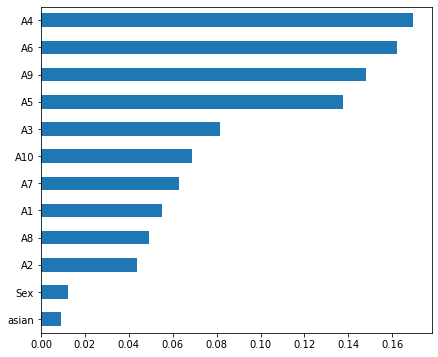

In [26]:
feature_importances = pd.Series(forest.feature_importances_, index=X.columns)
feature_importances.sort_values(inplace=True, ascending=True)
print(feature_importances)
feature_importances.plot(kind='barh', figsize=(7,6))

# Machine Learning using (A1-A10, Sex, and White)

In [48]:
X = df.drop(['Family_ASD', 'Class', 'black', 'hispanic',
       'latino', 'middle eastern', 'others', 'Age', 'Jaundice', 'south asians', 'asian'], axis=1)
Y = df['Class']
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(
    X, Y, test_size=validation_size, random_state=seed)

In [49]:
seed = 7
scoring = 'accuracy'

results = []
names = []

# evaluate each model in turn
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(
        model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarn

LR: 0.999333 (0.002000)
LDA: 0.969320 (0.013717)
KNN: 0.939960 (0.013334)
CART: 0.949942 (0.022057)


/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/m

RF: 0.949960 (0.016955)
NB: 0.959298 (0.022421)
SVM: 1.000000 (0.000000)


/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anacon

## Hyperparameter tuning

In [50]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(X_train, Y_train)
    result = accuracy_score(Y_validation, forest.predict(X_validation))
    results.append(result) 
    print(n, ':', result)

1 : 0.9226666666666666
4 : 0.9546666666666667
5 : 0.952
8 : 0.96
10 : 0.9546666666666667
20 : 0.9626666666666667
50 : 0.9626666666666667
75 : 0.9546666666666667
100 : 0.9546666666666667
250 : 0.96
500 : 0.9573333333333334


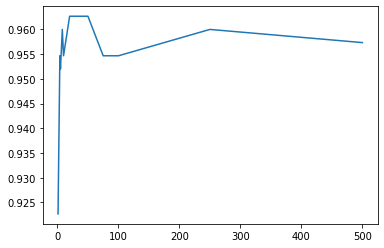

In [51]:
plt.plot(n_estimators_array, results)

In [52]:
from sklearn.model_selection import RandomizedSearchCV
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [53]:
rf = RandomForestClassifier(n_estimators=500)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42)
# Fit the random search model
rf_random.fit(X_train, Y_train)

/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 90 is smaller than n_iter=100. Running 90 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV] min_samples_leaf=1, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=1, max_features=auto, max_depth=10 .............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=1, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=2, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=2, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=2, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=4, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=4, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=4, max_features=auto, max_depth=10 ......

[CV]  min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.6s
[CV] min_samples_leaf=2, max_features=auto, max_depth=30 .............
[CV]  min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.6s
[CV] min_samples_leaf=4, max_features=auto, max_depth=30 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=30, total=   0.6s
[CV] min_samples_leaf=4, max_features=auto, max_depth=30 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=30, total=   0.6s
[CV] min_samples_leaf=4, max_features=auto, max_depth=30 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=30, total=   0.6s
[CV] min_samples_leaf=1, max_features=None, max_depth=30 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=30, total=   0.7s
[CV] min_samples_leaf=1, max_features=None, max_depth=30 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=30, total=   0.8s
[CV] min_samples_leaf=1, max_features=None, max_depth=30 ......

[CV]  min_samples_leaf=4, max_features=auto, max_depth=50, total=   0.6s
[CV] min_samples_leaf=4, max_features=auto, max_depth=50 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=50, total=   0.6s
[CV] min_samples_leaf=1, max_features=None, max_depth=50 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=50, total=   0.7s
[CV] min_samples_leaf=1, max_features=None, max_depth=50 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=50, total=   0.7s
[CV] min_samples_leaf=1, max_features=None, max_depth=50 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=50, total=   0.7s
[CV] min_samples_leaf=2, max_features=None, max_depth=50 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=50, total=   0.9s
[CV] min_samples_leaf=2, max_features=None, max_depth=50 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=50, total=   0.8s
[CV] min_samples_leaf=2, max_features=None, max_depth=50 ......

[CV]  min_samples_leaf=1, max_features=None, max_depth=70, total=   0.7s
[CV] min_samples_leaf=1, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=70, total=   0.7s
[CV] min_samples_leaf=2, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=70, total=   0.7s
[CV] min_samples_leaf=2, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=70, total=   0.7s
[CV] min_samples_leaf=2, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=70, total=   0.7s
[CV] min_samples_leaf=4, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=4, max_features=None, max_depth=70, total=   0.7s
[CV] min_samples_leaf=4, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=4, max_features=None, max_depth=70, total=   0.6s
[CV] min_samples_leaf=4, max_features=None, max_depth=70 ......

[CV]  min_samples_leaf=2, max_features=None, max_depth=90, total=   0.7s
[CV] min_samples_leaf=2, max_features=None, max_depth=90 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=90, total=   0.6s
[CV] min_samples_leaf=4, max_features=None, max_depth=90 .............
[CV]  min_samples_leaf=4, max_features=None, max_depth=90, total=   0.7s
[CV] min_samples_leaf=4, max_features=None, max_depth=90 .............
[CV]  min_samples_leaf=4, max_features=None, max_depth=90, total=   0.7s
[CV] min_samples_leaf=4, max_features=None, max_depth=90 .............
[CV]  min_samples_leaf=4, max_features=None, max_depth=90, total=   0.6s
[CV] min_samples_leaf=1, max_features=log2, max_depth=90 .............
[CV]  min_samples_leaf=1, max_features=log2, max_depth=90, total=   0.6s
[CV] min_samples_leaf=1, max_features=log2, max_depth=90 .............
[CV]  min_samples_leaf=1, max_features=log2, max_depth=90, total=   0.6s
[CV] min_samples_leaf=1, max_features=log2, max_depth=90 ......

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  2.8min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=500,
                                                    n_jobs=None,
 

In [54]:
rf_random.best_params_

{'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20}

In [55]:
forest = RandomForestClassifier(n_estimators=20, min_samples_leaf=2, max_features='auto', max_depth=50)
forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
forestPredictions = forest.predict(X_validation)
print(confusion_matrix(Y_validation, forestPredictions))
print(classification_report(Y_validation, forestPredictions))

[[224   8]
 [  7 136]]
              precision    recall  f1-score   support

          No       0.97      0.97      0.97       232
         Yes       0.94      0.95      0.95       143

    accuracy                           0.96       375
   macro avg       0.96      0.96      0.96       375
weighted avg       0.96      0.96      0.96       375



white    0.011386
Sex      0.015217
A2       0.037279
A8       0.054935
A7       0.060569
A1       0.068943
A10      0.075451
A3       0.123350
A4       0.126532
A5       0.132252
A9       0.142455
A6       0.151633
dtype: float64


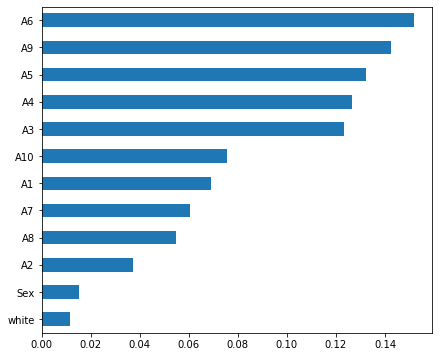

In [57]:
feature_importances = pd.Series(forest.feature_importances_, index=X.columns)
feature_importances.sort_values(inplace=True, ascending=True)
print(feature_importances)
feature_importances.plot(kind='barh', figsize=(7,6))

# Machine Learning with best fit model predictors taken from stepwise regregression from BOTH RStudios. (Asian, Sex, White)

In [37]:
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age',
       'Sex', 'Jaundice', 'Family_ASD', 'Class', 'asian', 'black', 'hispanic',
       'latino', 'middle eastern', 'others', 'south asians', 'white'],
      dtype='object')

In [38]:
X = df.drop(['Family_ASD', 'Class', 'black', 'hispanic',
       'latino', 'middle eastern', 'others', 'Age', 'Jaundice', 'south asians'], axis=1)
Y = df['Class']
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(
    X, Y, test_size=validation_size, random_state=seed)

In [39]:
seed = 7
scoring = 'accuracy'

results = []
names = []

# evaluate each model in turn
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(
        model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarn

LR: 0.999333 (0.002000)
LDA: 0.969987 (0.014054)
KNN: 0.942631 (0.011223)
CART: 0.944613 (0.018463)


/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/m

RF: 0.945275 (0.015556)
NB: 0.954622 (0.025650)
SVM: 1.000000 (0.000000)


/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anacon

### Random Forest with hyperparameter tuning 

In [40]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(X_train, Y_train)
    result = accuracy_score(Y_validation, forest.predict(X_validation))
    results.append(result) 
    print(n, ':', result)

1 : 0.896
4 : 0.9493333333333334
5 : 0.9573333333333334
8 : 0.952
10 : 0.952
20 : 0.9573333333333334
50 : 0.952
75 : 0.952
100 : 0.9546666666666667
250 : 0.9546666666666667
500 : 0.9546666666666667


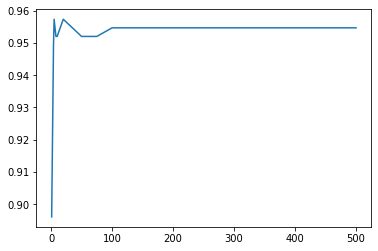

In [41]:
plt.plot(n_estimators_array, results)

In [42]:
from sklearn.model_selection import RandomizedSearchCV
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [43]:
rf = RandomForestClassifier(n_estimators=500)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV] min_samples_leaf=1, max_features=auto, max_depth=10 .............


/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 90 is smaller than n_iter=100. Running 90 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=1, max_features=auto, max_depth=10 .............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=1, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=2, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=2, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=2, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=4, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=4, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.5s
[CV] min_samples_leaf=4, max_features=auto, max_depth=10 ......

[CV]  min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.6s
[CV] min_samples_leaf=2, max_features=auto, max_depth=30 .............
[CV]  min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.5s
[CV] min_samples_leaf=4, max_features=auto, max_depth=30 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=30, total=   0.5s
[CV] min_samples_leaf=4, max_features=auto, max_depth=30 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=30, total=   0.5s
[CV] min_samples_leaf=4, max_features=auto, max_depth=30 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=30, total=   0.5s
[CV] min_samples_leaf=1, max_features=None, max_depth=30 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=30, total=   0.7s
[CV] min_samples_leaf=1, max_features=None, max_depth=30 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=30, total=   0.7s
[CV] min_samples_leaf=1, max_features=None, max_depth=30 ......

[CV]  min_samples_leaf=4, max_features=auto, max_depth=50, total=   0.6s
[CV] min_samples_leaf=4, max_features=auto, max_depth=50 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=50, total=   0.6s
[CV] min_samples_leaf=1, max_features=None, max_depth=50 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=50, total=   0.7s
[CV] min_samples_leaf=1, max_features=None, max_depth=50 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=50, total=   0.7s
[CV] min_samples_leaf=1, max_features=None, max_depth=50 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=50, total=   0.7s
[CV] min_samples_leaf=2, max_features=None, max_depth=50 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=50, total=   0.7s
[CV] min_samples_leaf=2, max_features=None, max_depth=50 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=50, total=   0.7s
[CV] min_samples_leaf=2, max_features=None, max_depth=50 ......

[CV]  min_samples_leaf=1, max_features=None, max_depth=70, total=   0.7s
[CV] min_samples_leaf=1, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=70, total=   0.7s
[CV] min_samples_leaf=2, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=70, total=   0.7s
[CV] min_samples_leaf=2, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=70, total=   0.7s
[CV] min_samples_leaf=2, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=70, total=   0.7s
[CV] min_samples_leaf=4, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=4, max_features=None, max_depth=70, total=   0.7s
[CV] min_samples_leaf=4, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=4, max_features=None, max_depth=70, total=   0.7s
[CV] min_samples_leaf=4, max_features=None, max_depth=70 ......

[CV]  min_samples_leaf=2, max_features=None, max_depth=90, total=   0.7s
[CV] min_samples_leaf=2, max_features=None, max_depth=90 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=90, total=   0.7s
[CV] min_samples_leaf=4, max_features=None, max_depth=90 .............
[CV]  min_samples_leaf=4, max_features=None, max_depth=90, total=   0.7s
[CV] min_samples_leaf=4, max_features=None, max_depth=90 .............
[CV]  min_samples_leaf=4, max_features=None, max_depth=90, total=   0.7s
[CV] min_samples_leaf=4, max_features=None, max_depth=90 .............
[CV]  min_samples_leaf=4, max_features=None, max_depth=90, total=   0.6s
[CV] min_samples_leaf=1, max_features=log2, max_depth=90 .............
[CV]  min_samples_leaf=1, max_features=log2, max_depth=90, total=   0.6s
[CV] min_samples_leaf=1, max_features=log2, max_depth=90 .............
[CV]  min_samples_leaf=1, max_features=log2, max_depth=90, total=   0.6s
[CV] min_samples_leaf=1, max_features=log2, max_depth=90 ......

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  2.8min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=500,
                                                    n_jobs=None,
 

In [44]:
rf_random.best_params_

{'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 80}

In [45]:
forest = RandomForestClassifier(n_estimators=20, min_samples_leaf=2, max_features='auto', max_depth=50)
forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
forestPredictions = forest.predict(X_validation)
print(confusion_matrix(Y_validation, forestPredictions))
print(classification_report(Y_validation, forestPredictions))

[[224   8]
 [  9 134]]
              precision    recall  f1-score   support

          No       0.96      0.97      0.96       232
         Yes       0.94      0.94      0.94       143

    accuracy                           0.95       375
   macro avg       0.95      0.95      0.95       375
weighted avg       0.95      0.95      0.95       375



asian    0.007306
Sex      0.015191
white    0.016376
A2       0.034835
A8       0.044710
A1       0.052780
A10      0.061440
A7       0.081684
A3       0.096158
A5       0.106391
A9       0.130852
A4       0.168169
A6       0.184109
dtype: float64


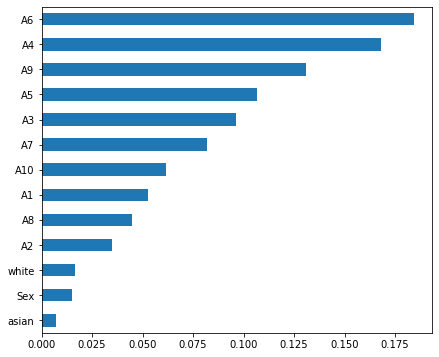

In [47]:
feature_importances = pd.Series(forest.feature_importances_, index=X.columns)
feature_importances.sort_values(inplace=True, ascending=True)
print(feature_importances)
feature_importances.plot(kind='barh', figsize=(7,6))